In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the Ames housing dataset
ames_housing = fetch_openml(name="house_prices", as_frame=True)

# Display the shape of the data
print(ames_housing.data.shape)

# Display the feature names
print(ames_housing.feature_names)

# Convert to DataFrame for easier handling
ames_df = ames_housing.frame
print(ames_df.head())


(1460, 80)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

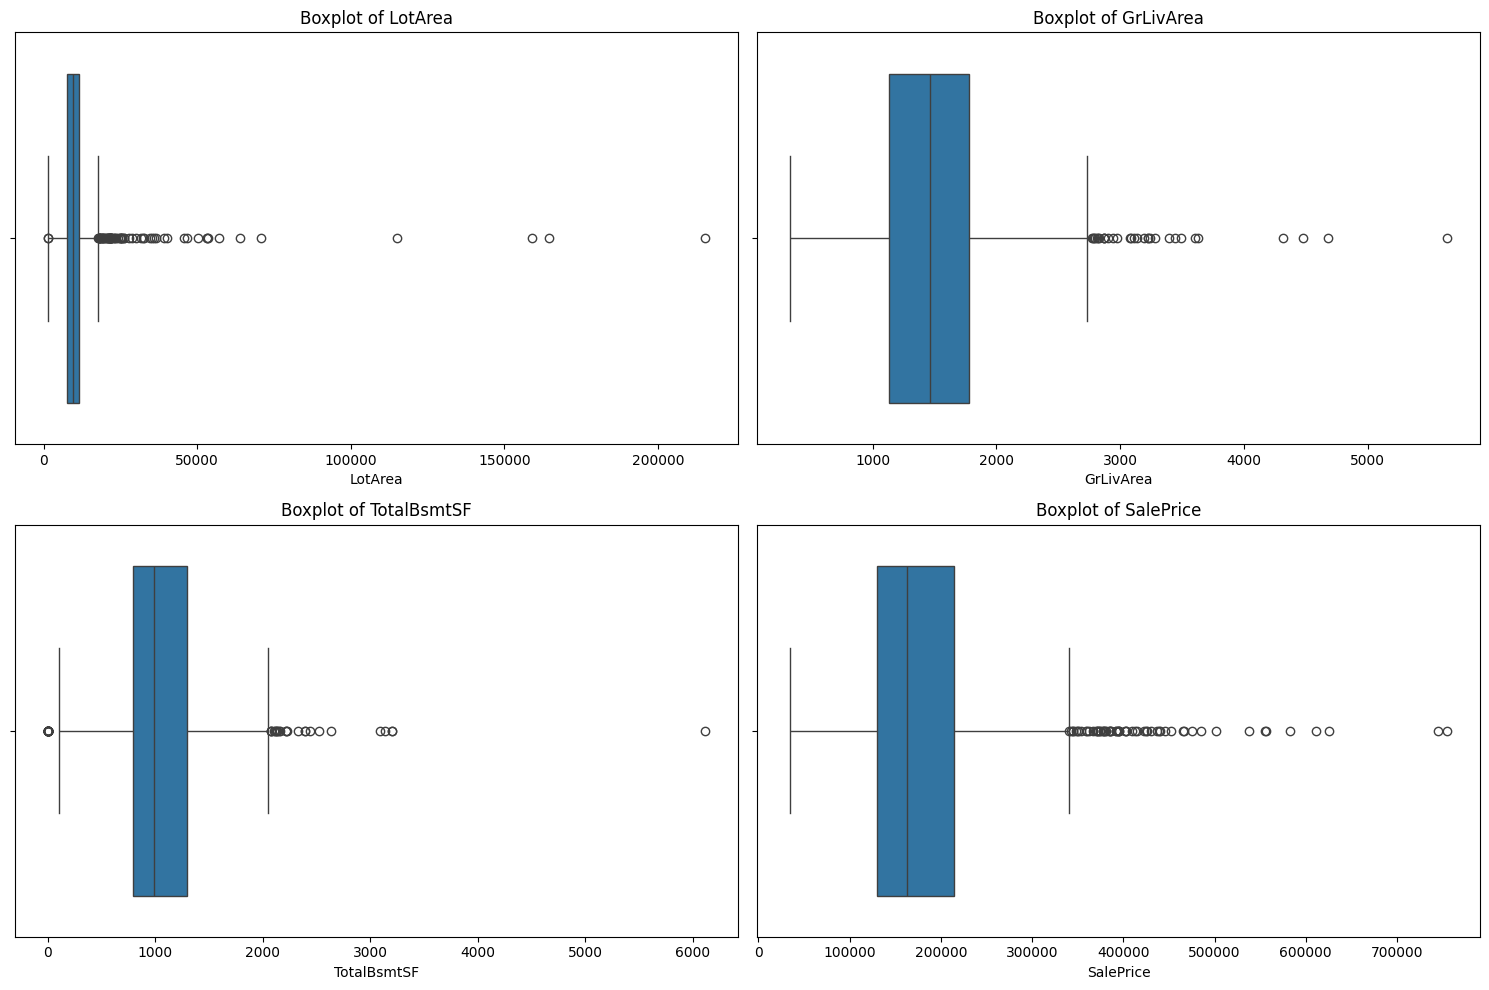

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select a subset of numerical features to visualize
features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']

# Create boxplots for selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=ames_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [3]:
# Function to remove outliers using IQR
print("Before outlier is Removed:",ames_df.shape)
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Apply the function to each feature
for feature in features:
    ames_df = remove_outliers_iqr(ames_df, feature)

# Display the shape of the data after removing outliers
print("Dataset shape after removing outliers:", ames_df.shape)

# Show the first few rows of the cleaned dataset
print(ames_df.head())

# Optional: Create boxplots for the features after removing outliers
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(15, 10))
#for i, feature in enumerate(features, 1):
##    plt.subplot(2, 2, i)
#    sns.boxplot(x=ames_df[feature])
#    plt.title(f'Boxplot of {feature} (outliers removed)')

#plt.tight_layout()
#plt.show()

Before outlier is Removed: (1460, 81)
Dataset shape after removing outliers: (1249, 81)
   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
